In [32]:
#Did classification before of KNN and fitting model and then having test data to determine which category it fell in.
#Note that this division into regression and classification problemsis made based on the nature of the output, not the inputs,
#and it's common for both regression and classification problems to involve a mixture of quantitative and qualitative inputs.

In [33]:
#Least squares loss is used to estimate the expected value of outputs, whereas  0−1  loss is used to estimate the probability 
#of outputs.

In [34]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [35]:
n=100
beta_0=5
beta_1=2
np.random.seed(1)
x=10*ss.uniform.rvs(size=n) #generates random variables that are distributed on 0-1 interval. Multiplt 10 so 0 to 10.
y=beta_0 + beta_1*x + ss.norm.rvs(loc=0,scale=1,size=n)
#beta_1 is coefficient and beta_0 is coefficient. The rvs is adding some noise, where loc=0 is mean=0. Size has to match x.

Text(0, 0.5, 'y')

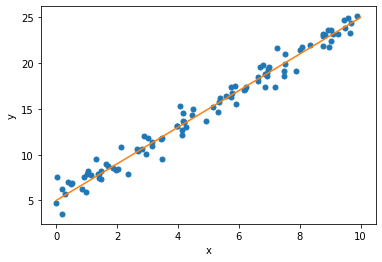

In [36]:
plt.figure()
plt.plot(x,y,"o",ms=5)
xx=np.array([0,10]) #picked the lowest and highest value 
plt.plot(xx, beta_0 + beta_1*xx) #This is a deterministic model with no randomness 
plt.xlabel("x")
plt.ylabel("y")

In [37]:
#Samepled 100 points from interval 0,10 and there is also Guassian noise for blue points that we added and orange line is 
#the determinsitc line with no randomness.

In [38]:
np.mean(x)

4.8587792760014565

In [39]:
np.mean(y)

14.80142786070299

In [40]:
#ei=yi - yi(predicted y from model) 
#RSS (Residual sum of squares)= e1^2 + e2^2 +... en^2. Least squares estimate minimises the RSS.

In [41]:
def compute_rss(y_estimate, y):
  return sum(np.power(y-y_estimate, 2)) #in this case the ys are np arrays of 50 values. 
def estimate_y(x, b_0, b_1):
  return b_0 + b_1 * x #after gaining a b_0 and b_1 from prediction algo., then estmate y can be found and therefore rss
rss = compute_rss(estimate_y(x, beta_0, beta_1), y)

In [42]:
rss

81.540007425512

In [43]:
y #'ss.norm.rvs(loc=0,scale=1,size=n)' only thing different from y_estimate. There is noise in real and y estimate only uses
#test data as a prediciton for other points.

array([13.65607504, 17.38428865,  4.69608348, 11.8746261 ,  8.16521255,
        7.60878308,  8.50287608, 11.71045647, 13.12191088, 16.18638633,
       13.58219001, 18.82339865,  8.41838271, 22.93991251,  5.66957313,
       19.53883411, 14.54501393, 16.35895299,  7.43245382,  8.32329937,
       21.43838573, 24.44257158, 10.92462989, 18.89004917, 21.9077822 ,
       23.5901653 ,  6.25375566,  7.00560337,  8.80010003, 23.15642859,
        5.87202483, 13.59153493, 24.89834705, 14.7096051 , 18.57132377,
       11.34292717, 17.35690123, 22.00767283,  6.21192619, 19.14337036,
       25.12776776, 18.65102968, 10.57018433, 19.16981421,  8.18593784,
       14.36677106, 23.14729311, 10.09712135, 12.0292627 ,  9.56767319,
        3.52935729, 19.81287469, 10.86021307, 10.64894488, 13.63219515,
        6.93059622, 16.30143181,  7.33065087, 15.5560526 , 19.5457047 ,
        7.83949544, 12.65758903, 19.40857949, 12.139244  ,  6.80093021,
       15.76449542, 18.08932313, 15.19603637, 24.76078128, 17.48

In [44]:
estimate_y(x, beta_0, beta_1)

array([13.34044009, 19.40648987,  5.0022875 , 11.04665145,  7.93511782,
        6.8467719 ,  8.72520423, 11.91121454, 12.93534948, 15.77633468,
       13.38389029, 18.70439001,  9.08904499, 22.56234873,  5.54775186,
       18.4093502 , 13.34609605, 16.17379657,  7.80773877,  8.96202978,
       21.01489137, 24.36523151, 11.26848356, 18.84645231, 22.52778305,
       22.89213327,  6.70088423,  5.78109566,  8.39660839, 22.56285007,
        6.96693668, 13.4221525 , 24.1577906 , 15.6633057 , 18.83754228,
       11.31031262, 18.73001855, 21.69251344,  5.36576555, 20.0028863 ,
       24.77722178, 19.96331309, 10.60887984, 20.78558657,  7.06452013,
       13.95787052, 23.17191006, 10.87228297, 10.75550677,  7.60057144,
        5.38733916, 18.57671066,  9.23256232, 10.31093319, 14.83146319,
        6.0672509 , 16.48235211,  7.9345715 , 16.78611074, 18.9951672 ,
        7.04668858, 13.28111976, 18.88800315, 13.28358539,  5.99906918,
       15.71792812, 18.2758929 , 15.29778224, 23.89189512, 16.73

In [45]:
rss=[]
slopes=np.arange(-10,15,0.01) #slope starts at -10, goes to 15 and steps of 0.01.
for slope in slopes:
    rss.append(np.sum((y-beta_0-slope*x)**2)) #y is actual value and the y estimate is based on each of the slopes in slopes
    #and each of these will have an rss which can then be used to check minimum one.

In [46]:
rss

[465163.6265980302,
 464389.08137639664,
 463615.18165403913,
 462841.9274309581,
 462069.3187071535,
 461297.35548262496,
 460526.03775737283,
 459755.36553139694,
 458985.33880469744,
 458215.9575772741,
 457447.22184912727,
 456679.1316202565,
 455911.68689066224,
 455144.8876603442,
 454378.73392930237,
 453613.22569753695,
 452848.36296504777,
 452084.145731835,
 451320.5739978984,
 450557.64776323806,
 449795.36702785414,
 449033.7317917465,
 448272.7420549152,
 447512.39781736,
 446752.69907908136,
 445993.6458400789,
 445235.23810035264,
 444477.47585990286,
 443720.35911872925,
 442963.8878768319,
 442208.062134211,
 441452.8818908663,
 440698.347146798,
 439944.45790200593,
 439191.21415649017,
 438438.6159102507,
 437686.66316328745,
 436935.3559156006,
 436184.6941671901,
 435434.67791805574,
 434685.3071681979,
 433936.5819176162,
 433188.50216631085,
 432441.0679142817,
 431694.2791615289,
 430948.1359080525,
 430202.6381538523,
 429457.7858989284,
 428713.5791432808,
 42

In [47]:
ind_min=np.argmin(rss)

In [48]:
ind_min

1200

In [49]:
print("Estimate for slope: ", slopes[ind_min]) 
#Here the slope value is extremely close to the actual value, however, usually in practical settings estimated value doesnt
#always match real. Another point is generally we wont know the true value, but here we do since we generated the data ourselves

Estimate for slope:  1.9999999999997442


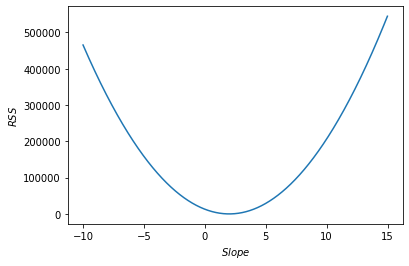

In [50]:
plt.figure()
plt.plot(slopes, rss)
plt.xlabel("$Slope$")
plt.ylabel("$RSS$");

In [51]:
rss1=[]
slopes1=np.arange(-10,15,0.001) 
for slope in slopes1:
    rss1.append(np.sum((y-beta_0-slope*x)**2)) 
ind_min1=np.argmin(rss1)
print("Estimate for slope with finer steps: ", slopes1[ind_min1])

Estimate for slope with finer steps:  2.003999999993347


In [52]:
import statsmodels.api as sm
mod=sm.OLS(y,x) # y are y-values and x are predictor values. These are x values we created at start in reference to the y values
#also created at start. They are the real values, both of them, just we generated the test data ourselves.
est=mod.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Fri, 15 May 2020   Prob (F-statistic):                    1.14e-75
Time:                        14:02:40   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [53]:
X=sm.add_constant(x) #add constant y inrercept since forced to go through origin and thats why coef is 2.8 not 2.
mod=sm.OLS(y,X)
est=mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Fri, 15 May 2020   Prob (F-statistic):           7.47e-82
Time:                        14:02:40   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

In [54]:
#the 95% condfidence interval is the 0.025 and 0.975 where the standrd dev.(error) is taken into account and becomes eg.
#1.97+- 1.97*0.031. 
#The R squared includes the proption of TSS and RSS. TSS is the total squared sum and for median outcome and actual y while
#RSS is residual squared sum and is for predicted outcome with the coef and constant calc. with the actual y. 

In [55]:
#In multiple linear regression, it is Y=beta_0 + beta_1*X1 + beta_2*X2...+beta_p*Xp. 
#In general, consider a predictor Xk and the parameter beta k associated with that predictor. A unit change the value of xk 
#is associated with a change beta hat k in the value of the outcome y, while keeping all other predictors fixed.
#If the values of the predictors are correlated, it may not be possible to change the value of one predictorand keep the others 
#fixed. So one therefore always needs to be careful with interpretation of model results.

In [56]:
#Y=beta_0 + beta_1*X1 + beta_2*X2, where beta_1=1 and beta_2=3
#For a given expected output prediction  y^ , what would be the expected change in the prediction value if you increased  
#x1  by 1, and decreased  x2  by 3? It is -8 (since 1-9=-8).

In [60]:
n=500
beta_0=5
beta_1=2
beta_2=-1
np.random.seed(1)
x_1=10*ss.uniform.rvs(size=n)
x_2=10*ss.uniform.rvs(size=n)
y=beta_0 + beta_1*x_1 + beta_2*x_2 + ss.norm.rvs(loc=0, scale=1, size=n)

In [61]:
X=np.stack([x_1,x_2], axis=1) #Take the two xs and stack as columns in X, turning into matrix.

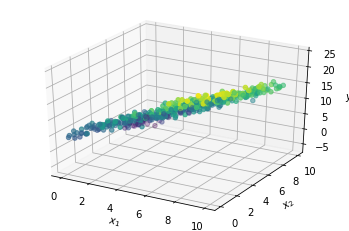

In [65]:
from mpl_toolkits.mplot3d import Axes3D #There are two non-constant variables and therefore 3D 
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0], X[:,1], y, c=y)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$y$");

In [68]:
#So far generate data from a simple model. Now, Learn how to fit a linear regression model using the scikit-learn library.
#Fits so can create a predictor equation which will show how accurate it is with data given.
from sklearn.linear_model import LinearRegression
lm=LinearRegression(fit_intercept=True)
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
lm.intercept_ #gives values of estimated intercept

5.154077763777254

In [71]:
lm.coef_[0] #value of beta_1

1.9999378989891399

In [72]:
lm.coef_[1]

-1.020264486993336

In [78]:
X_0=np.array([2,4]) #value of x_1 and x_2
lm.predict(X_0) #predicts where this new point will be using the predictor equation from fit()

ValueError: Expected 2D array, got 1D array instead:
array=[2 4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [79]:
lm.predict(X_0.reshape(1,-1)) #Since it is a single saple with two parameters

array([5.07289561])

In [80]:
lm.score(X,y) #Here what it does is take the input values X and predict the y with its predictor equation/ model. It then 
#compares those values with the actual y values in training set and gives a score.

0.9798997316600129

In [87]:
#MSE evaluates performance of regression model. Test/Train error rate evaluates of model in classification setting.
#doing MSE (mean squared error) on training data (used for fit) is called training MSE.
#We can get estimates of test error by dividing data set into training data and test data where test doesnt help in fit model.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.5,random_state=1) #50% train set and the X is previously defined
#and the y_test is the y values from y (actual) which isnt in the training data. y_train is the y (actual) for train data to fit

In [88]:
lm1=LinearRegression(fit_intercept=True)
lm1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
lm1.score(X_test,y_test) #a.k.a r squared value

0.9794930834681773

In [90]:
#Overfitting tends to follow the noise to carefully and in extreme cases memorizes data points instead of structure. So poor
#performance with unseen data.

In [147]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [209]:
h=1
sd=1
n=50

x1=ss.norm.rvs(-h, sd, n) #where -h is mean, standard dev., size. It gives x coordinates from first class of data (random)
y1=ss.norm.rvs(0, sd, n)

x2=ss.norm.rvs(h, sd, n)
y2=ss.norm.rvs(0, sd, n)

In [230]:
def gen_data(n,h,sd1,sd2):
    np.random.seed(0)
    x1=ss.norm.rvs(-h, sd1, n) 
    y1=ss.norm.rvs(0, sd1, n)
    x2=ss.norm.rvs(h, sd2, n)
    y2=ss.norm.rvs(0, sd2, n)
    return(x1,y1,x2,y2)

In [231]:
x1,y1,x2,y2=gen_data(50,1,1,1.5)

In [232]:
x1,y1,x2,y2=gen_data(1000,1.5,1,1.5)

In [233]:
def plot_data(x1,y1,x2,y2):
    plt.figure()
    plt.plot(x1,y1,"o",ms=2)
    plt.plot(x2,y2,"o",ms=2)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

<IPython.core.display.Javascript object>


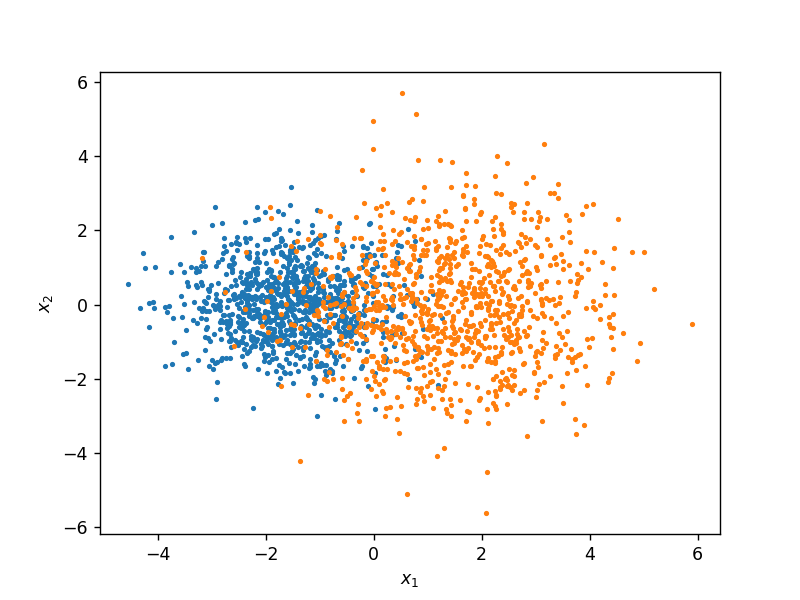

In [234]:
plot_data(x1,y1,x2,y2)

In [102]:
#blue points coming from observations in class 1 and orange comes from observations in class 2.
#Orange cloud is wider since larger standard dev.

<IPython.core.display.Javascript object>


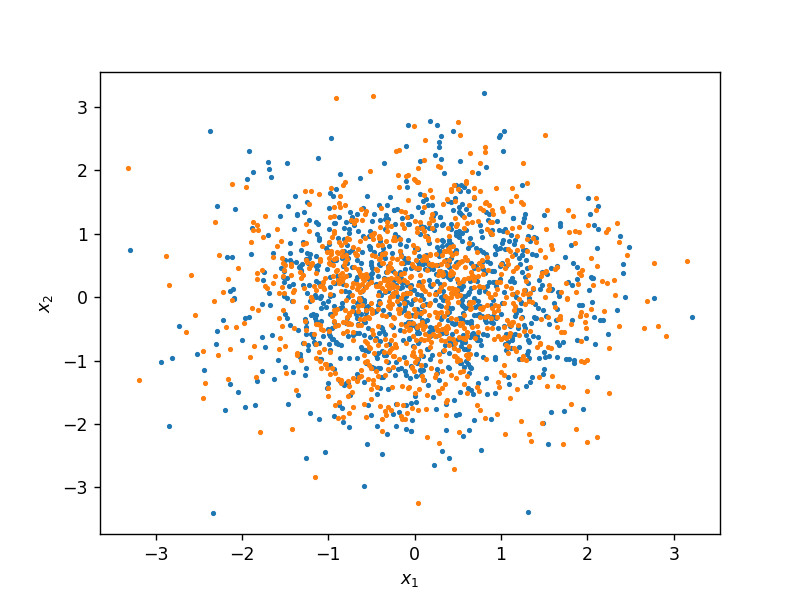

In [112]:
x1,y1,x2,y2=gen_data(1000, 0, 1, 1)
plot_data(x1,y1,x2,y2) #very close since mean is 0 so all points originate at 0.

<IPython.core.display.Javascript object>


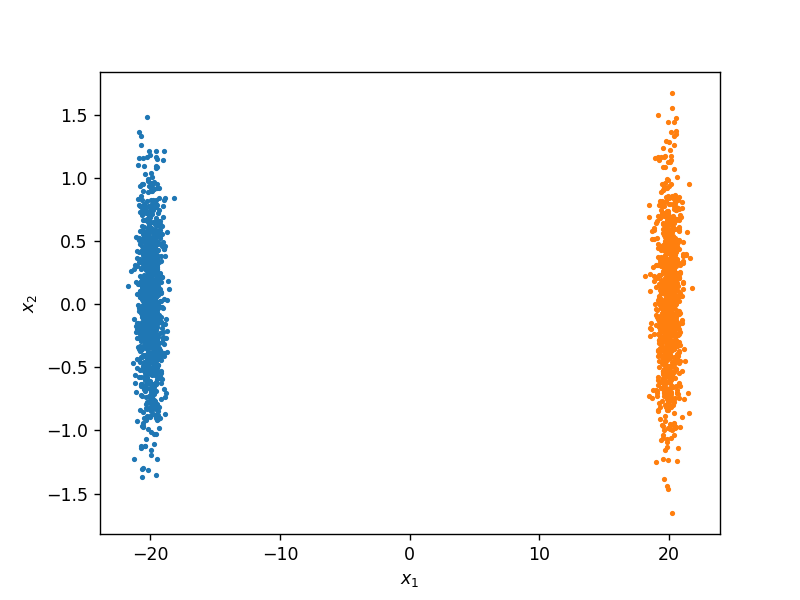

In [111]:
x1,y1,x2,y2=gen_data(1000, 20,0.5,0.5)
plot_data(x1,y1,x2,y2) #really spread out since mean is 20 and -20.

In [114]:
#Logistic regression applies to binary classifier.

In [115]:
#Our goal is to model the conditional probability that the outcome belongs to a particular class conditional on the values
#of the predictors. We can also call these conditional class probabilities.
#We can write p of x as a shorthand for the probability that y is equal to 1 given the value of x. So this is a conditional 
#probability. If y is not equal to 1, it must be 0. And this happens with probability 1 minus p of x.

In [215]:
def prob_to_odds(p):
    if p <= 0 or p >= 1:
        print("Probabilities must be between 0 and 1.")
    return p / (1-p)
prob_to_odds(0.8)

4.000000000000001

In [235]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [236]:
np.vstack((x1,y1)).shape #wrong shape, wants 1000 rows and 2 columns, one column as x1 and the other as y1.

(2, 1000)

In [237]:
np.vstack((x1,y1)).T

array([[ 0.26405235,  0.55596268],
       [-1.09984279,  0.89247389],
       [-0.52126202, -0.42231482],
       ...,
       [-1.4058077 ,  0.15843385],
       [-2.64761094, -1.14190142],
       [-1.85811408, -1.31097037]])

In [238]:
X=np.vstack((np.vstack((x1,y1)).T, np.vstack((x2,y2)).T))

In [239]:
X.shape #combine x1 x2 in one column and y1 y2 in one column as whole matrix.

(2000, 2)

In [240]:
n=1000
y=np.hstack((np.repeat(1,n),np.repeat(2,n)))

In [241]:
y.shape #stacks y1 results and y2 results which are classified as 1 and then 2.

(2000,)

In [242]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.5,random_state=1) 

In [243]:
X_train.shape

(1000, 2)

In [244]:
y_train.shape

(1000,)

In [245]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [246]:
clf.score(X_test,y_test)

0.898

In [247]:
clf.predict_proba([-2,0])

ValueError: Expected 2D array, got 1D array instead:
array=[-2  0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [249]:
clf.predict_proba(np.array([-2,0]).reshape(1,-1)) #so telling us 0.96 prob point belongs to class 1

array([[0.96171045, 0.03828955]])

In [252]:
clf.predict(np.array([-2,0]).reshape(1,-1)) #predicts which class. Gives the class that has a p greater than 0.5.

array([1])

In [253]:
#To summarize:
#If you have data and want to train a model: clf.fit()
#If you want to compute the accuracy of your model: clf.score()
#If you want to estimate the probability of a data point being in each class: clf.predict_proba()
#If you want to know to which class your model would assign a new data point: clf.predict()

In [263]:
def plot_probs(ax,clf,class_no):
    xx1,xx2=np.meshgrid(np.arange(-5,5,0.1),np.arange(-5,5,0.1)) #creates xx1 and xx2 where each elements together is a 
    #coordinate. Each coordinate is a point in the grid present to test conditional prob.
    #The output of meshgrid is 2 matricies, xx1 and xx2. Python np. arange() function returns an evenly spaced values within 
    #a given interval.
    probs=clf.predict_proba(np.stack((xx1.ravel(),xx2.ravel()),axis=1)) #ravel function changes matrix to vector by taking 
    #each row of matrix and adding it adjacently to one long vector. Column stack these two vectors into one. n rows, 2 columns.
    Z=probs[:,class_no] #want to extract all rows of matrix which correspond to the class number. eg.0,1. 
    Z=Z.reshape(xx1.shape) #need to plot on xx1,xx2 plane so need xx1 shape.
    CS=ax.contourf(xx1,xx2,Z) #need to know what axes (ax) to which the contour plot will be added.
    cbar=plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$");

In [257]:
xx1.shape

(100, 100)

<IPython.core.display.Javascript object>


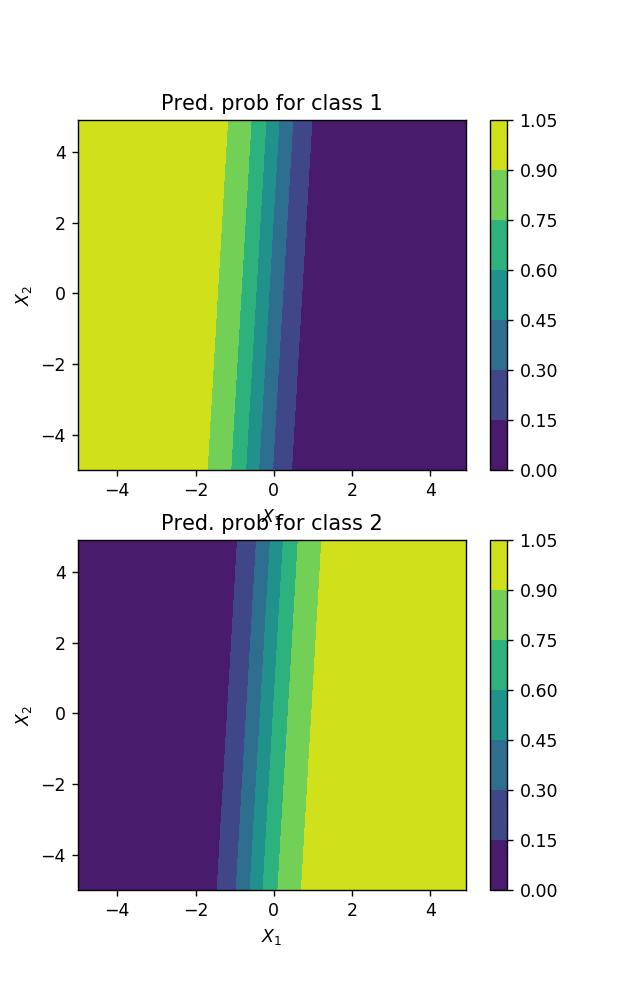

Text(0.5, 1.0, 'Pred. prob for class 2')

In [260]:
plt.figure(figsize=(5,8))
ax=plt.subplot(211)
plot_probs(ax,clf,0) #Estimating the probabilities that these different observations belong to class 0, the first class.
plt.title("Pred. prob for class 1")
ax=plt.subplot(212)
plot_probs(ax,clf,1)
plt.title("Pred. prob for class 2")

In [261]:
#So shows points to the left have high prob of being in class 1 and points to the right have high prob in class 2.

In [268]:
#Tree-Based Methods for Regression and Classification. Mean outcomes in a given region as predicted outcome for an unseen
#observation is for regression. More classification it is mode.
#So we can minimize error by finding maximally homogeneous regions in the predictor space.
#In loss function, for regression usually RSS is used. For classification, Gini index and cross entropy.
#Whenever we make a split, we consider all predictors from x1 to xp,and for each predictor, we consider all possible cut points.
#We choose the predictor - cut point combination such that the resulting division of the predictor space has the lowest value 
#of some criterion, usually called a loss function, that we're trying to minimize.

#we first find the region where this data point falls. In this case, Because it's a classification problem, we find the mode 
#of these observations in the region. If they all seem to belong to class two, then pred. for point is class 2.

In [269]:
#The prediction of the random forest combines information from the predictions of the individual trees. In the regression 
#setting, the prediction of the random forest is the mean of the predictions of the individual trees. Classification is mode.
#There are two randomness settings that differentiate the individual tress from each other. The first is randomness of data
#where each tree to fit to somewhat different dataset. Other is which predictors are considered when making a split at any point

In [271]:
#For randomness of data: Bootstrap is a re-sampling method, which involves repeatedly drawing samples from a training set and 
#refitting a model on each sample. Each dataset will have an indivdual tree.
#Second random setting: If have 9 predictors (x1 to x9) can use 3 predictors each cut and these 3 will be different comb. each
#time.

#To make a prediction using a random forest, we identify the region in the predicted space separately for each tree, where the 
#test observation happens to fall. Based on this, we next have each tree make a separate prediction. And we then combine the 
#predictions of the individual trees to form the prediction of the forest.

In [272]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
#Then continue with similar ideas as before.